In [4]:
#importing all the packages
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator #we can use if we have less no of imgs in a dataset
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
import os

Using TensorFlow backend.


In [39]:
#no of classes and the batch size
number_of_classes = 5 #sad,happy,neutral,angry,surprise are 5 kinds of emotion labels
image_rows,image_columns=48,48 #trgetd size
batch_size= 32 #work on 32 images at a time(try changing and expt it)


In [40]:
#traing and valdn dataset directory
train_data_dir=r"D:\IITK\train"
validation_data_dir=r"D:\IITK\validation"


In [41]:
train_datagen = ImageDataGenerator(
                 rescale=1./255,    #rescale the image 0 to 1
                 rotation_range=30,  #rotate the image 0 to 30 degree both l and r
                 shear_range=0.3,
                 zoom_range=0.3,
                 width_shift_range=0.4,
                 height_shift_range=0.4,
                 horizontal_flip=True,   #to have another img with thiss img itelf
                 fill_mode='nearest')     #if pixels moved to right then the nearest ones will leave that img behind in l
                        #can see wat kind of data augmentation is done in keras docm also
    

In [42]:
validation_datagen = ImageDataGenerator(rescale=1./255)           #no need to generate more imgs here iin valdn only needed for training 

In [43]:
train_generator=train_datagen.flow_from_directory(
                train_data_dir,             #this train data will be taken as the ip
                color_mode='grayscale',     #colour can be gray bcoz structure of face is enough not the colour 
                target_size=(image_rows,image_columns),
                batch_size=batch_size,          #32
                class_mode='categorical',       #here we have multiple classes (5 classes of emotions)
                shuffle='True')                 #need to shuffle bfore training to prevent any cheating if models knows bfore itself 


Found 24176 images belonging to 5 classes.


In [44]:
validation_generator=validation_datagen.flow_from_directory(
                validation_data_dir,             #this train data will be taken as the ip
                color_mode='grayscale',     #colour can be gray bcoz structure of face is enough not the colour 
                target_size=(image_rows,image_columns),
                batch_size=batch_size,          #32
                class_mode='categorical',       #here we have multiple classes (5 classes of emotions)
                shuffle='True')     

Found 3006 images belonging to 5 classes.


In [48]:
#defining our cnn
model= Sequential()

#block1
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(image_rows,image_columns,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(image_rows,image_columns,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

In [49]:
#block2
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))            #there is a chance of overfittinh  so we dropout 20% at a time only 80% get activated



In [51]:
#block 3
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

In [52]:
#block 4
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

In [53]:
#block 5
model.add(Flatten())          #to make it a oned data
model.add(Dense(64,kernel_initializer='he_normal'))      #dense layer of 64 neurons
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))      #only 50% data will be activated

In [54]:
#to make a fully connected layers not a conv2d
model.add(Dense(64,kernel_initializer='he_normal'))      #dense layer of 64 neurons
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

In [56]:
#block7 to generate 64 neurons n we need only 5 types of op(happy,sad,neutral...)

model.add(Dense(number_of_classes,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

In [57]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_3 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)       

In [58]:
#training step
from keras.optimizers import RMSprop,SGD,Adam   #check which gives high accuracy n less loss 
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau #(1.save the model after each epoch ,2.stop training when a monitered quantity has stopped learning ,3.reduced lrng rate when a metric stopped lrng)
checkpoint = ModelCheckpoint('Emotion_IITK.h5',
                           monitor='val_loss',
                           mode='min',
                           save_best_only=True,   #save the model with min loss
                           verbose=1)             #saving the model n got the best rsult


earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=10,       #upto 3 epochs we see
                          verbose=1,          
                          restore_best_weights=True
                         )
reduce_lr=ReduceLROnPlateau(monitor='val_loss',
                         factor=0.2,            #dec ythe lrng rate at 0.2
                         patience=10,            #dec the lrng rate after 3 epochs
                         verbose=1,
                         min_delta=0.0001)
callbacks=[earlystop,checkpoint,reduce_lr]
                        

                           
                           


In [17]:
#compilation

model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.001),
             metrics=['accuracy'])
nb_train_samples=24176  #no of imgs for training
nb_validation_samples=3006
epochs=100
history=model.fit_generator(          
        train_generator,
        steps_per_epoch=nb_train_samples//batch_size,
        epochs=epochs,
        callbacks=callbacks,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples//batch_size)

Epoch 1/100
755/755 [==============================] - 865s 1s/step - loss: 1.8728 - accuracy: 0.2445 - val_loss: 1.5408 - val_accuracy: 0.3135

Epoch 00001: val_loss improved from inf to 1.54083, saving model to Emotion_IITK.h5
Epoch 2/100
755/755 [==============================] - 768s 1s/step - loss: 1.5733 - accuracy: 0.2864 - val_loss: 1.5921 - val_accuracy: 0.3128

Epoch 00002: val_loss did not improve from 1.54083
Epoch 3/100
755/755 [==============================] - 784s 1s/step - loss: 1.5468 - accuracy: 0.3054 - val_loss: 1.5635 - val_accuracy: 0.3589

Epoch 00003: val_loss did not improve from 1.54083
Epoch 4/100
755/755 [==============================] - 777s 1s/step - loss: 1.5120 - accuracy: 0.3259 - val_loss: 1.4335 - val_accuracy: 0.3353

Epoch 00004: val_loss improved from 1.54083 to 1.43352, saving model to Emotion_IITK.h5
Epoch 5/100
755/755 [==============================] - 777s 1s/step - loss: 1.4599 - accuracy: 0.3615 - val_loss: 1.3324 - val_accuracy: 0.4802

E

In [60]:
import matplotlib.pyplot as plt

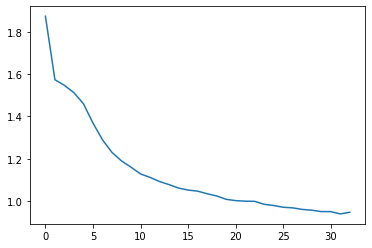

In [22]:
plt.plot(history.history['loss'])
plt.savefig('loss.png')

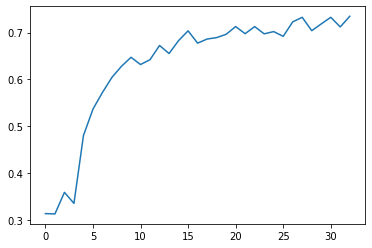

In [23]:
plt.plot(history.history['val_accuracy'])
plt.savefig('val_accuracy.png')

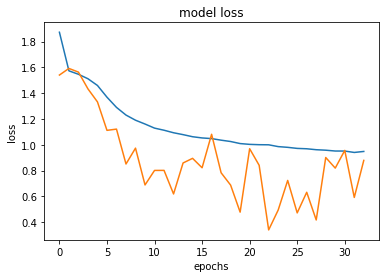

<Figure size 432x288 with 0 Axes>

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()
plt.savefig('model loss.png')

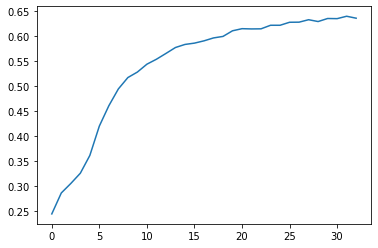

In [25]:
plt.plot(history.history['accuracy'])
plt.savefig('accuracy.png')

In [2]:
from tensorflow.keras.models import Sequential, save_model, load_model
import numpy as np

In [3]:
loaded_model=load_model('Emotion_IITK.h5')

TESTING